<a href="https://colab.research.google.com/github/Kutagulla-Saikalyan/Automating-Resume-Shortlisting-Using-AI/blob/main/Automating_Resume_Shortlisting_Using_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Automating Resume Shortlisting Using AI**

* **Problem Statement:** ABC Corporation is a rapidly growing company that receives a high volume of resumes for its job openings. The recruiters are struggling with the time-consuming task of manually screening and shortlisting suitable candidates. The company wants to improve the quality of its hiring decisions while reducing the time and effort required to screen resumes. To overcome this challenge, the company wants to use AI tools to automatically shortlist resumes based on job requirements.

* **Solution:** The company decided to leverage AI tools to automate the process of resume shortlisting. The goal was to use machine learning algorithms and natural language processing techniques to identify resumes that match the job requirements and rank them according to their suitability for the role.
The first step was to collect a large dataset of resumes and job descriptions. The data were preprocessed to remove irrelevant information and convert it into a machine-readable format. The dataset was then used to train a machine learning model using Python programming language.
* The machine learning model was trained using a variety of techniques such as feature extraction, text classification, and sentiment analysis to extract relevant features from the text and make accurate predictions. The model was trained to identify the relevant keywords, phrases, and skills required for a particular job and match them with the resumes.


* **Result:** The AI-powered system significantly reduced the time and effort required to screen resumes and improved the quality of hiring decisions. The system provided accurate and unbiased results that helped recruiters identify the most suitable candidates for the job. The system also helped the company to reduce its recruitment costs and improve its overall efficiency.

### Importing the Libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#reading & accessing the dataset
Data = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
Data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


### **Basic Checks**

In [ ]:
#Shape of the data
Data.shape

(962, 2)

In [ ]:
#information about the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
#Describing the categorical data
Data.describe(include='O')

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
#column names
for i in Data.columns:
    print(i)

Category
Resume


#### Missing values

In [ ]:
Data[Data.columns[Data.isna().any()]].head()

""
0
1
2
3
4


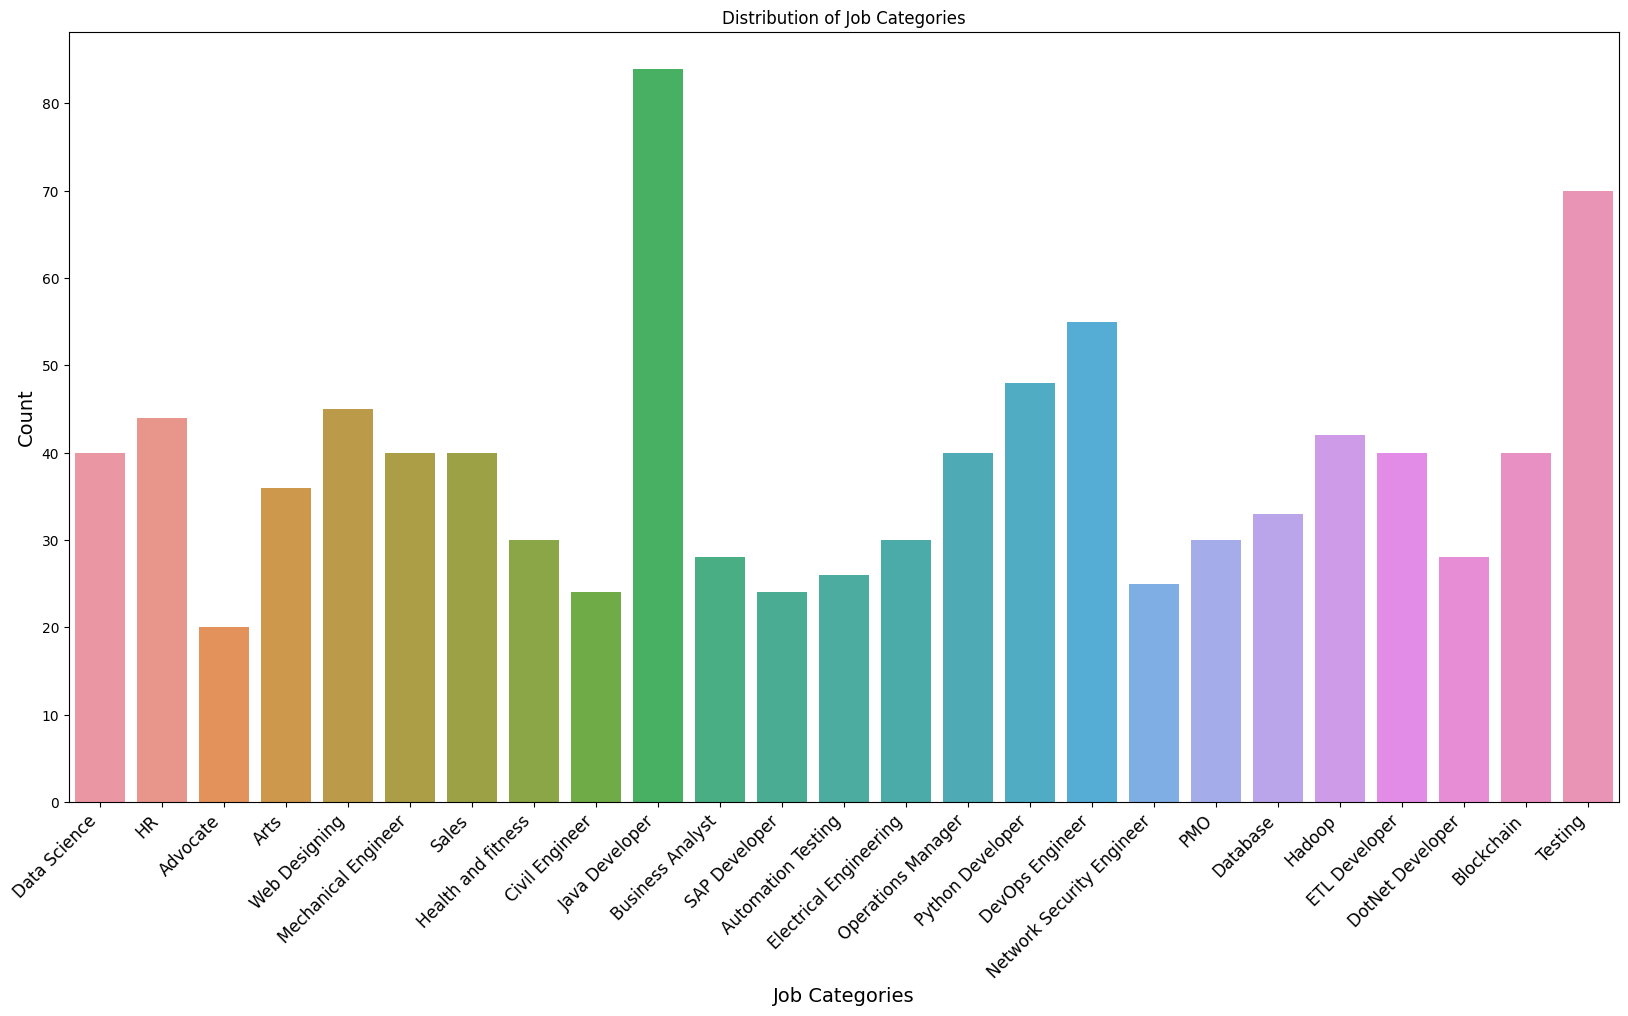

In [ ]:
# Check the distribution of job categories in the dataset
plt.figure(figsize=(20,10))
sns.countplot(x='Category', data=Data)
plt.title('Distribution of Job Categories')
plt.xlabel('Job Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.show()

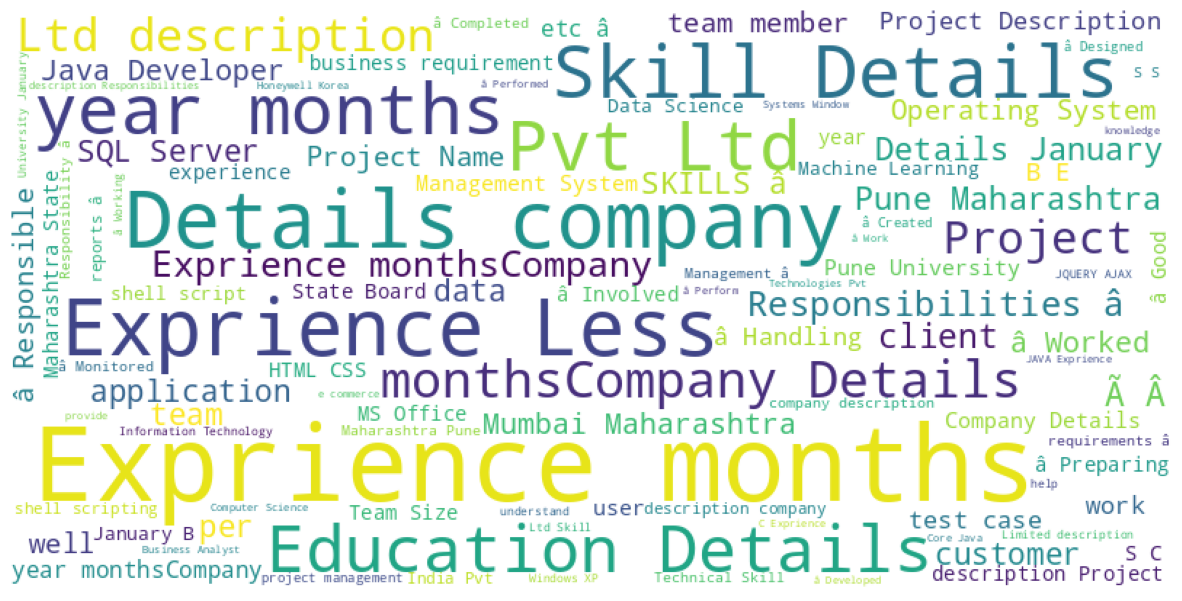

In [ ]:
# Create a wordcloud of the most frequent words in the 'Resume' column
text = ' '.join(Data['Resume'].dropna().values)
if len(text) > 0:
    wordcloud = WordCloud(background_color='white', max_words=100, width=800, height=400).generate(text)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
else:
    print("No valid words found in 'Resume' column.")

In [ ]:
# Remove personal information such as name, address, and contact information
Data['cleaned_resume'] = Data['Resume'].apply(lambda x: ' '.join([word for word in x.split() if not any(c.isdigit() for c in word)]))

In [ ]:
Data

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May to May B.E UIT-RGPV Data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details MCA YMCAUST, Faridabad, Hary..."
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


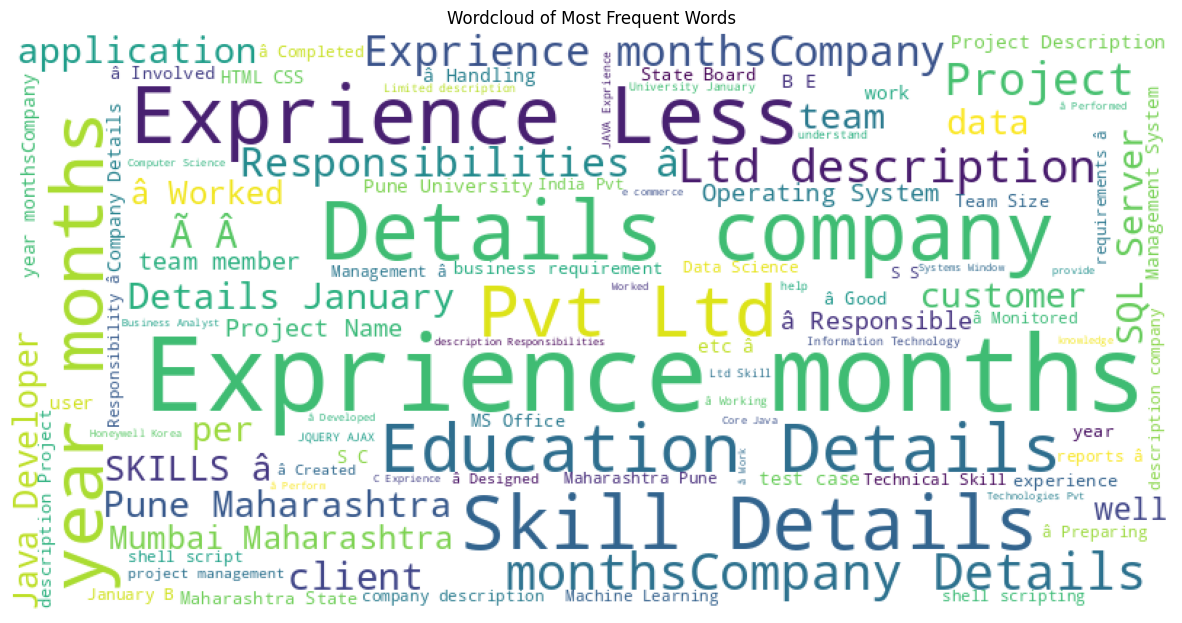

In [ ]:
# Create a wordcloud of the most frequent words in the 'cleaned_resume' column
text = ' '.join(Data['cleaned_resume'].values)
wordcloud = WordCloud(background_color='white', max_words=100, width=800, height=400).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud of Most Frequent Words')
plt.show()

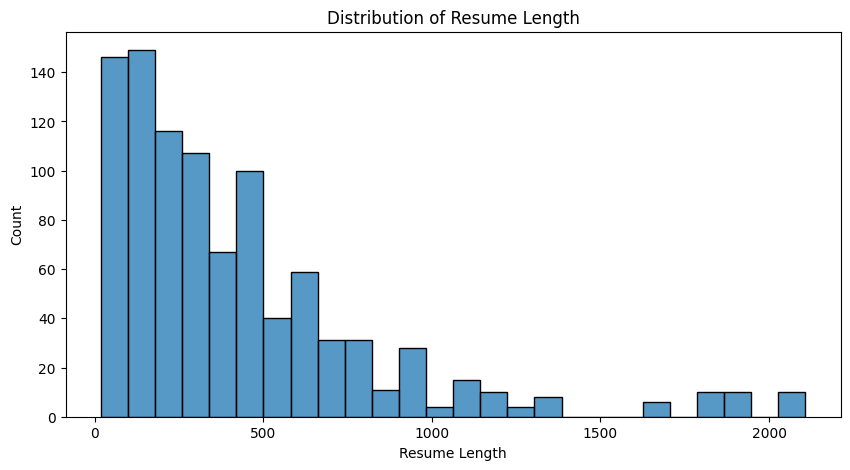

In [ ]:
# Check the distribution of the length of resumes in the dataset
Data['resume_length'] = Data['cleaned_resume'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(x='resume_length', data=Data)
plt.title('Distribution of Resume Length')
plt.xlabel('Resume Length')
plt.ylabel('Count')
plt.show()

In [ ]:
# Define the list of job categories
categories = list(Data['Category'].unique())

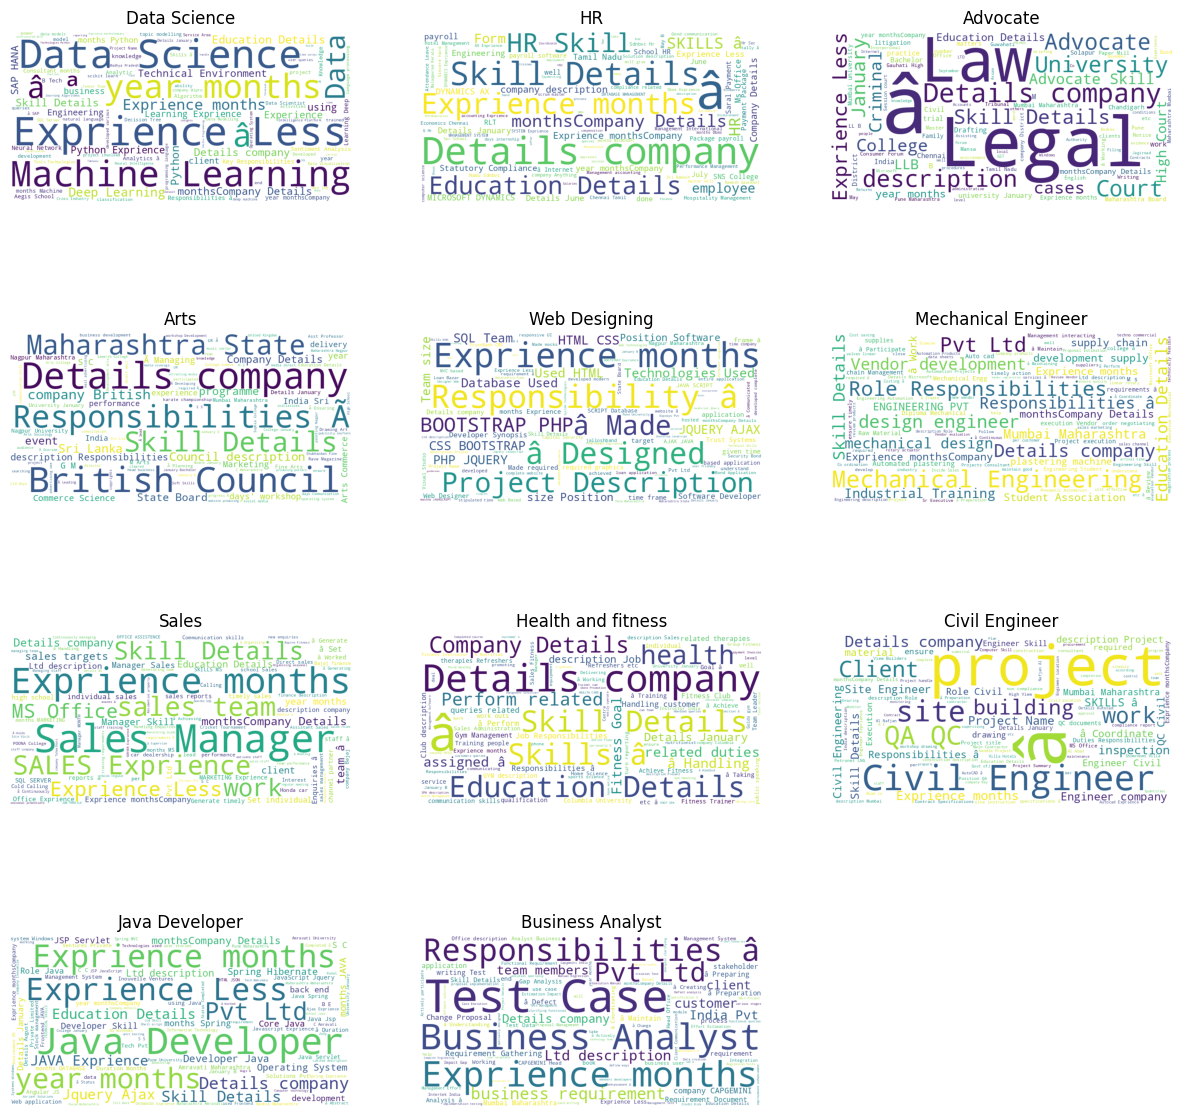

In [ ]:
# Check the most frequent words for each job category
plt.figure(figsize=(15,15))
for i, cat in enumerate(categories[:11]):
    text = ' '.join(Data[Data['Category']==cat]['cleaned_resume'].values)
    wordcloud = WordCloud(background_color='white', max_words=100, width=800, height=400).generate(text)
    plt.subplot(4, 3, i+1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(cat)
plt.show()

In [ ]:
# Plot the distribution of the top 10 skills mentioned in the resumes
skills = Data['cleaned_resume'].str.findall(r'(?i)\b(\w+\s*\w*|\w+)\b').explode().str.lower()
skill_set = ['machine learning', 'deep learning', 'data analysis', 'data visualization', 'statistical analysis',
             'database management', 'web development', 'cloud computing', 'project management', 'communication skills']
skills_counts = pd.Series([skills.str.contains(skill).sum() for skill in skill_set], index=skill_set)
fig = px.bar(x=skills_counts.index, y=skills_counts.values, title='Top 10 Skills Mentioned in Resumes',
             color=skills_counts.values, color_continuous_scale='Jet')
fig.update_xaxes(title='Skill')
fig.update_yaxes(title='Count')
fig.show()

In [ ]:
# Plot the distribution of the top 10 words mentioned in the resumes
languages = Data['cleaned_resume'].str.findall(r'(?i)\b(\w+\s*\w*|\w+)\b').explode().str.lower()
languages_counts = languages.value_counts().nlargest(10)
fig = px.bar(x=languages_counts.index, y=languages_counts.values, color=skills_counts.values, color_continuous_scale='Earth', title='Top 10 Words Mentioned in Resumes')
fig.update_xaxes(title='Words Mentioned in Resumes')
fig.update_yaxes(title='Count')
fig.show()

In [ ]:
# Plot the distribution of the length of resumes by job category
fig = px.box(Data, x='Category', y='resume_length', title='Distribution of Resume Length by Job Category')
fig.update_xaxes(title='Job Category')
fig.update_yaxes(title='Resume Length')
fig.show()

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 16.

### Automated EDA library

In [ ]:
import pandas as pd
import dataprep
from dataprep.eda import create_report

In [ ]:
create_report(Data)

### Feature extraction

In [ ]:
Data

,Category,Resume,cleaned_resume,resume_length
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...,661
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May to May B.E UIT-RGPV Data...,151
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste...",249
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,965
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details MCA YMCAUST, Faridabad, Hary...",63
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills: â¢ Proficient in MS office (...,305
958,Testing,â Willingness to accept the challenges. â ...,â Willingness to accept the challenges. â ...,318
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",444
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,102


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Regular Expression

In [ ]:
text = Data

In [ ]:
# Lets create a new dataframe for checking without disturbing the first frame
Data_new = text[['Category',	'cleaned_resume']]
Data_new.head()

,Category,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details May to May B.E UIT-RGPV Data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary..."


#### Preprocessing techniques

In [ ]:
# Remove tags in the tweets
def remove_tags(text):
    return re.sub('@[A-Za-z0-9-]+([A-Z|a-z])','',text)

# Remove all special characters between brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)   #Remove special characters

# Removing special characters including no's
def remove_special_characters(text,remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

# Removing numbers from the data
def remove_numbers(text):
    pattern = r'\d+'
    text = re.sub(pattern,'',text)
    return text

# Remove individual letters from the data:
def remove_individual_letters(text):
    pattern = r'\ [a-z] '
    text = re.sub(pattern,'',text)
    return text

In [ ]:
import re
# Denoising text
def denoise_text(text):
    text = remove_tags(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_individual_letters(text)
    return text  #Function call

Data_new['cleaned_resume_new'] =Data_new['cleaned_resume'].apply(denoise_text)
Data_new.head(5)

,Category,cleaned_resume,cleaned_resume_new
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas nu...
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,Education Details May to May BE UITRGPV Data S...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",Education Details MCA YMCAUST Faridabad Haryan...


### Final Dataframe:

This is how the different patterns using regular expressions look.

In [ ]:
Data_new['cleaned_resume_new'] =Data_new['cleaned_resume_new']
Data_new.head()

,Category,cleaned_resume,cleaned_resume_new
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas nu...
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,Education Details May to May BE UITRGPV Data S...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",Education Details MCA YMCAUST Faridabad Haryan...


#### More Preprocessing techniques

#### Removing Stopwords

Here, we shall remove stopwords and also remove them at last to check if there are none of them

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    else:
        filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

Data_new['cleaned_resume_new'] = Data_new['cleaned_resume_new'].apply(remove_stopwords)
Data_new.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Category,cleaned_resume,cleaned_resume_new
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,Education Details May May BE UITRGPV Data Scie...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas Interest Deep Learning Control System De...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",Education Details MCA YMCAUST Faridabad Haryan...


#### Removing Outliers and Noise reduction

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

### Stemming

In [ ]:
def simpleStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

Data_new['cleaned_resume_new'] = Data_new['cleaned_resume_new'].apply(simpleStemmer)
Data_new.head()

,Category,cleaned_resume,cleaned_resume_new
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,educ detail may may be uitrgpv data scientist ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",educ detail mca ymcaust faridabad haryana data...


#### Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
def simpleLemmatization(text):
    lemma = nltk.stem.WordNetLemmatizer()
    text = ' '.join([lemma.lemmatize(word) for word in text.split()])
    return text

Data_new['cleaned_resume_new'] = Data_new['cleaned_resume_new'].apply(simpleLemmatization)
Data_new.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Category,cleaned_resume,cleaned_resume_new
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,educ detail may may be uitrgpv data scientist ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",educ detail mca ymcaust faridabad haryana data...


#### Removing Stopwords

Here, we are removing stopwords in the lemmatized text once again to check if there are no stopwords.

In [ ]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

Data_new['cleaned_resume_new'] = Data_new['cleaned_resume_new'].apply(remove_stopwords)
Data_new.head()

,Category,cleaned_resume,cleaned_resume_new
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,educ detail may may uitrgpv data scientist dat...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",educ detail mca ymcaust faridabad haryana data...


#### TextBlob

We use TextBlob to give polarity to the text. Lets see how!

In [ ]:
from textblob import TextBlob

In [ ]:
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

Data_new['polarity'] = Data_new['cleaned_resume_new'].apply(pol)
Data_new['subjectivity'] = Data_new['cleaned_resume_new'].apply(sub)

Data_new.head()

,Category,cleaned_resume,cleaned_resume_new,polarity,subjectivity
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...,-0.010317,0.228266
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,educ detail may may uitrgpv data scientist dat...,-0.400000,0.700000
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...,-0.086364,0.406061
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,0.013719,0.536687
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",educ detail mca ymcaust faridabad haryana data...,0.000000,0.000000


In [ ]:
## Tokenizing the words
import nltk
nltk.download('punkt')

def tok(text):
    return nltk.word_tokenize(text)

Data_new['tokenize'] = Data_new['cleaned_resume_new'].apply(tok)
Data_new.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Category,cleaned_resume,cleaned_resume_new,polarity,subjectivity,tokenize
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...,-0.010317,0.228266,"[skill, program, languag, python, panda, numpi..."
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,educ detail may may uitrgpv data scientist dat...,-0.400000,0.700000,"[educ, detail, may, may, uitrgpv, data, scient..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...,-0.086364,0.406061,"[area, interest, deep, learn, control, system,..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,0.013719,0.536687,"[skill, r, python, sap, hana, tableau, sap, ha..."
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",educ detail mca ymcaust faridabad haryana data...,0.000000,0.000000,"[educ, detail, mca, ymcaust, faridabad, haryan..."


In [ ]:
# Adding all the words to a single list
import itertools,collections

# creating a list from it
new_tokenize = Data_new['tokenize']
all_words = list(itertools.chain(*new_tokenize))

In [ ]:
# Collections are datastructures for the list of words
# Counter is used to count all words
counts = collections.Counter(all_words)
# Most common words
count_frequency = counts.most_common(200)

clean_resume = pd.DataFrame(counts.most_common(200),columns=['words', 'count'])
clean_resume.head()

,words,count
0,project,3847
1,exprienc,3817
2,compani,3621
3,manag,3559
4,develop,3394


No of most common words to plot: 40


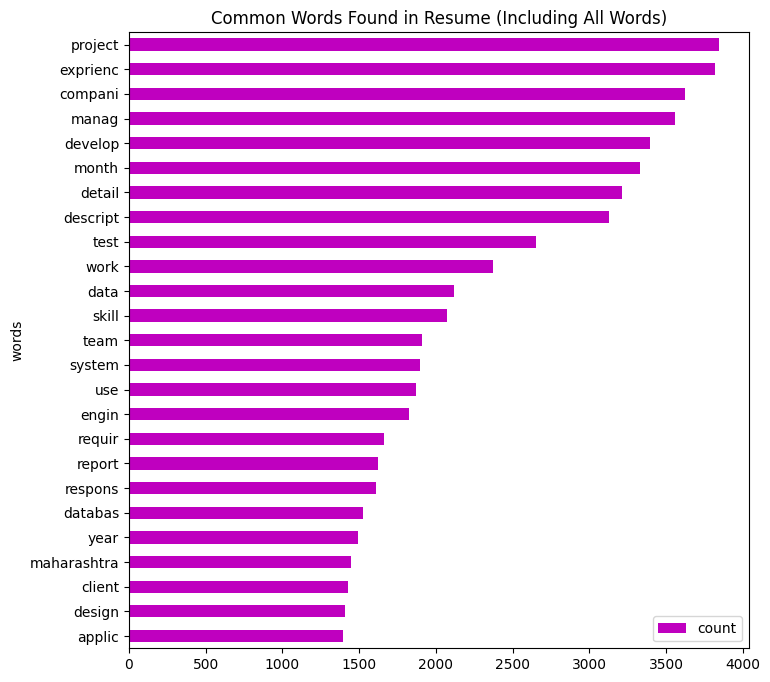

In [ ]:
# Input to see the most common words used
Number = input('No of most common words to plot: ')
# Plot a bar chart to see the count of most frequent words used
fig, ax = plt.subplots(figsize=(8, 8))
clean_resume[:25].sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='m')
ax.set_title("Common Words Found in Resume (Including All Words)")
plt.show()

In [ ]:
Data_new['polarity'] = Data_new['polarity'].apply(lambda x: "Positive" if x>=0.05 else ("Negative" if x<= -0.05 else "Neutral"))
Data_new.head()

,Category,cleaned_resume,cleaned_resume_new,polarity,subjectivity,tokenize
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...,Neutral,0.228266,"[skill, program, languag, python, panda, numpi..."
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,educ detail may may uitrgpv data scientist dat...,Negative,0.700000,"[educ, detail, may, may, uitrgpv, data, scient..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...,Negative,0.406061,"[area, interest, deep, learn, control, system,..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,Neutral,0.536687,"[skill, r, python, sap, hana, tableau, sap, ha..."
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",educ detail mca ymcaust faridabad haryana data...,Neutral,0.000000,"[educ, detail, mca, ymcaust, faridabad, haryan..."


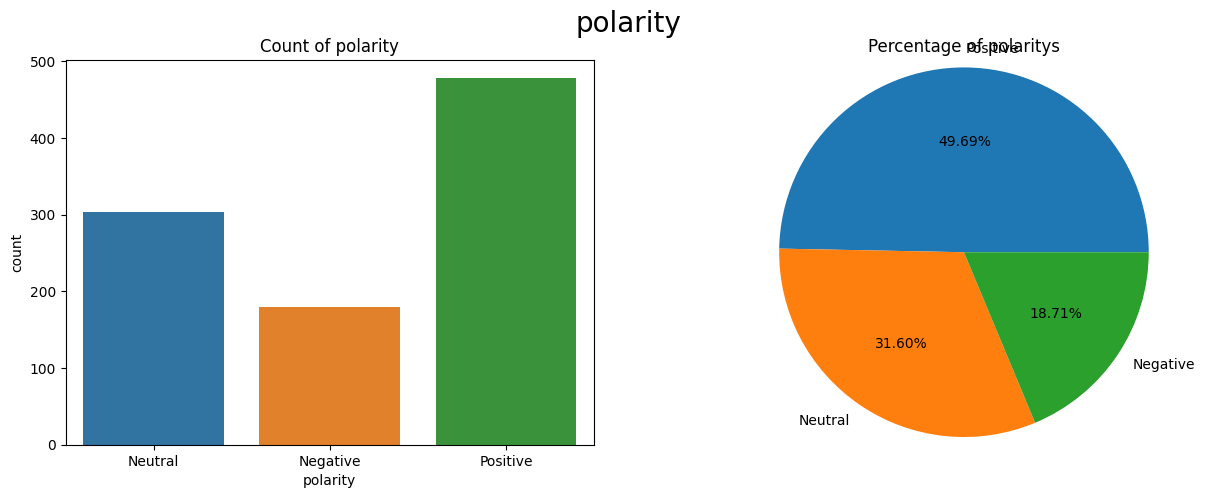

In [ ]:
# Lets see the count of positive, Negative and Neutral tweets
# 1 row and 2 columns subplots definition
fig,axes = plt.subplots(1,2,figsize=(15,5))
# Fixing supertitle
fig.suptitle('polarity',fontsize=20)

# count plot in first plot with the given column as axes[0]
sns.countplot(ax=axes[0],x='polarity',data=Data_new)
# set the title of the plot
axes[0].set_title('Count of {}'.format('polarity'),fontsize=12)
# If there are more than 5 categories in the column, rotate labels
if Data_new['polarity'].value_counts().index.size>5:
    # set labels and Rotate labels
    axes[0].set_xticklabels(labels=Data_new['polarity'].unique(),rotation=90)

# pie plot in second plot of defined subplots
axes[1] = plt.pie(Data_new['polarity'].value_counts().values,labels=Data_new['polarity'].value_counts().index,radius=1.2,autopct='%1.2f%%')
# fix the title of the plot
plt.title('Percentage of {}s'.format('polarity'))
plt.show()

### Normalize train and test data

In [ ]:
df = Data_new
df.head(3)

,Category,cleaned_resume,cleaned_resume_new,polarity,subjectivity,tokenize
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...,Neutral,0.228266,"[skill, program, languag, python, panda, numpi..."
1,Data Science,Education Details May to May B.E UIT-RGPV Data...,educ detail may may uitrgpv data scientist dat...,Negative,0.700000,"[educ, detail, may, may, uitrgpv, data, scient..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...,Negative,0.406061,"[area, interest, deep, learn, control, system,..."


Logistic Regression Model

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Preprocess the text data
df['resume'] = df['cleaned_resume_new'].apply(lambda x: x.lower())
df['resume'] = df['cleaned_resume_new'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

# Tokenize the cleaned_resume column
df['tokenized_resume'] = df['resume'].apply(lambda x: x.split())

# Extract features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['resume'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00      1.00     

Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Initializing and fitting the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting the categories of the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the decision tree classifier: {accuracy}")
# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of the decision tree classifier: 0.9948186528497409
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12


### Testing the model and ranking resumes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Define a function to map suitability scores to rating scores
def get_rating_score(suitability_score):
    if suitability_score >= 0.8:
        return 5
    elif suitability_score >= 0.6:
        return 4
    elif suitability_score >= 0.4:
        return 3
    elif suitability_score >= 0.2:
        return 2
    else:
        return 1

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Test_resume.csv')

# Data preprocessing
df['Resume'] = df['Resume'].str.lower() # Convert all text to lowercase
df.drop_duplicates(subset='Resume', inplace=True) # Remove duplicate resumes

# Preprocess the resume and job description data to extract relevant features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Resume'])
y = df['Category']

# Initializing and fitting the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Categorize all the resumes according to job descriptions
resumes_by_job_description = {}
for job_description in set(y):
    job_resumes = df[df['Category'] == job_description]['Resume'].tolist()
    resumes_by_job_description[job_description] = job_resumes

# Categorize all job descriptions
job_descriptions_by_category = {}
for category in set(y):
    job_descriptions = df[df['Category'] == category]['Category'].tolist()
    job_descriptions_by_category[category] = job_descriptions

# Suggest the top-ranked resumes for each job description
ranked_resumes_by_job_description = []
for job_description in set(y):
    job_resumes = resumes_by_job_description[job_description]
    X_job = vectorizer.transform(job_resumes)
    suitability_scores_for_job = clf.predict_proba(X_job)[:, 1]
    rating_scores_for_job = [get_rating_score(score) for score in suitability_scores_for_job]
    ranked_resumes_for_job = sorted(zip(rating_scores_for_job, job_resumes), reverse=True)
    ranked_resumes_by_job_description.append((job_description, ranked_resumes_for_job))

# Rank the resumes based on their predicted suitability scores for all job descriptions
suitability_scores = clf.predict_proba(X)[:, 1]
rating_scores = [get_rating_score(score) for score in suitability_scores]
ranked_resumes = sorted(zip(rating_scores, df['Resume']), reverse=True)

# Print the top-ranked resumes for each job description and explain why they are the top matching resumes
for job_description, ranked_resumes_for_job in ranked_resumes_by_job_description:
    print(f"Job description category: {job_description}\n")
    top_resume_score, top_resume = ranked_resumes_for_job[0]
    print(f"The top matching resume is:\n{top_resume}\n")
    print(f"It is the top matching resume because it has the highest predicted rating among all resumes for this job description. The rating is {top_resume_score}\n")
    print("____________________________________________________________________________________________________________________________________________________________")

# Print the ranked resumes for all job categories
print("Ranked resumes for all job categories:\n")
for rating_score, resume in ranked_resumes:
    print(f"Rating score: {rating_score}\nResume: {resume}\n")

Job description category: Advocate

The top matching resume is:
â¢ hard working â¢ quick learnereducation details 
june 2014 to may 2017 llb law mumbai, maharashtra mumbai university
january 2014 b.com commerce mumbai, maharashtra mumbai university
january 2011 hsc   maharashtra board
january 2009 ssc   maharashtra board
advocate 


skill details 
company details 
company - the vidishtra
description - 

It is the top matching resume because it has the highest predicted rating among all resumes for this job description. The rating is 1

____________________________________________________________________________________________________________________________________________________________
Job description category: Data Science

The top matching resume is:
skills â¢ python â¢ tableau â¢ data visualization â¢ r studio â¢ machine learning â¢ statistics iabac certified data scientist with versatile experience over 1+ years in managing business, data science consulting and leading 

Above code provided reads a CSV file containing resumes into a pandas DataFrame and performs some data preprocessing on the 'Resume' column. It then uses a CountVectorizer from scikit-learn to convert the text in the 'Resume' column into numerical features that can be used as input for a decision tree classifier. The decision tree classifier is initialized with a random state of 42 and fitted on the feature matrix (X) and the target variable (y), which is extracted from the 'Category' column of the DataFrame.

After the code categorizes the resumes based on their job descriptions by creating a dictionary ('resumes_by_job_description') that maps each job description to a list of resumes associated with that job description. Similarly, it categorizes the job descriptions by creating another dictionary ('job_descriptions_by_category') that maps each category to a list of job descriptions associated with that category.

The code then suggests the top-ranked resumes for each job description by calculating the suitability scores for each resume using the trained decision tree classifier. The suitability scores are based on the predicted probabilities of the resumes belonging to the positive class (job description) as calculated by the predict_proba() method of the classifier. The resumes for each job description are ranked based on their suitability scores in descending order and stored in a list of tuples ('ranked_resumes_for_job').

**Conclusion:**  We ranks all resumes based on their predicted suitability scores for all job descriptions and stores them in a list of tuples ('ranked_resumes'). It then prints the top-ranked resumes for each job description along with their scores and provides an explanation for why the top-ranked resume is ranking with a score of 1, indicating the highest predicted suitability score among all resumes for that job description.